In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

In [19]:
# Setting the parameters
N = 10000   # number of rounds - customer visiting web page with Ad
d = 9       # number of strategies

In [20]:
# Creating the simulation (for 9 strategies here)
# Unknown in a real business case - for simulation only
conversion_rates = [0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01]

In [21]:
# Create the reward matrix (num of rounds x result for each strategy)
rewards = np.zeros((N,d))
# populate matrix according to the conversion rates
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:   # np.random.rand(d0, d1, ..., dn) returns Random values [0,1[ in a given shape d0xd1x...
            rewards[i,j] = 1

In [22]:
print(rewards)
print(rewards.shape)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(10000, 9)


# Implement random strategy and Thompson Sampling for comparison

In [23]:
selected_strategies_random = []
selected_strategies_thompson = []
total_rewards_random = 0
total_rewards_thompson = 0
numbers_of_rewards_1 = np.zeros(d)
numbers_of_rewards_0 = np.zeros(d)
reward_per_strategy = np.zeros(d)
regret_curve_random = []
regret_curve_thompson = []

for n in range(N):
    
    # Random strategy
    selected_strategy_random = random.randrange(d)
    selected_strategies_random.append(selected_strategy_random)
    total_rewards_random+= rewards[n,selected_strategy_random]
    
    # Thompson Sampling Strategy
    max_random_beta = 0
    startegy_with_max_beta = 0
    
    # for each strategy, random draw from beta distribution with 2 parameters then select highest
    for i in range(d):
        random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1) # return value in range 0,1
        if random_beta > max_random_beta:
            max_random_beta = random_beta
            startegy_with_max_beta_draw = i
    
    # Update Beta distribution parameters of selected strategy
    if rewards[n,startegy_with_max_beta_draw]==1:
        numbers_of_rewards_1[startegy_with_max_beta_draw]+=1
    else:
        numbers_of_rewards_0[startegy_with_max_beta_draw]+=1
        
    # Update Thompson sampling strategy KPIs
    selected_strategies_thompson.append(startegy_with_max_beta_draw)
    total_rewards_thompson += rewards[n,startegy_with_max_beta_draw]
    
    # Score per strategy
    for i in range(d):
        reward_per_strategy[i] +=rewards[n, i]
    
    # Regret as the difference between slected strategy and best strategy
    regret = max(reward_per_strategy) - total_rewards_random
    regret_curve_random.append(regret)
    regret = max(reward_per_strategy) - total_rewards_thompson
    regret_curve_thompson.append(regret)

# Measure performance

In [24]:
# Computing the Absolute and Relative Return
# in absolute monetary value assuming 1K€ extra revenue for each premium plan
absolute_return = (total_rewards_thompson - total_rewards_random) * 1
# profit increase in % vs random strategy
relative_return = (total_rewards_thompson - total_rewards_random) / total_rewards_random * 100

In [25]:
print(f'Performance achieved over {N} samples and the assumed strategy conversion rate:')
print('Absolute return: {:.0f}K€ extra profits'.format(absolute_return))
print('Relative return: {:.0f} % profit increase'.format(relative_return))

Performance achieved over 10000 samples and the assumed strategy conversion rate:
Absolute return: 925K€ extra profits
Relative return: 100 % profit increase


# Plot histogram of selected strategies

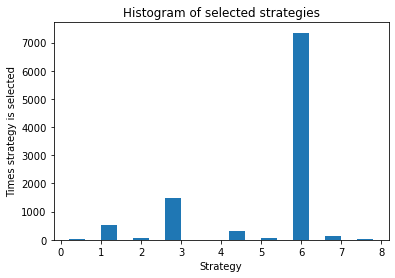

In [26]:
%matplotlib inline
plt.hist(selected_strategies_thompson, align='mid', rwidth=0.5)
plt.title('Histogram of selected strategies')
plt.xlabel('Strategy')
plt.ylabel('Times strategy is selected')
plt.show()

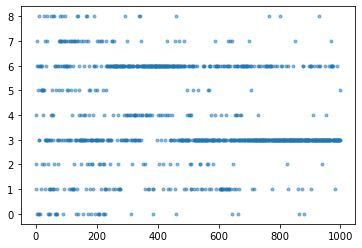

In [27]:
plt.scatter(range(1000), selected_strategies_thompson[:1000], marker='.', alpha=0.5)

In [28]:
def plot_scatter(k):
    plt.scatter(range(10*k,10*k+10), selected_strategies_thompson[10*k:10*k+10], marker='.', c='b', alpha=0.5)

In [29]:
# initialize a writer which uses ffmpeg and records at 20 fps with a bitrate of 1800
import matplotlib.animation as animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)

In [30]:
%matplotlib notebook

<IPython.core.display.Javascript object>


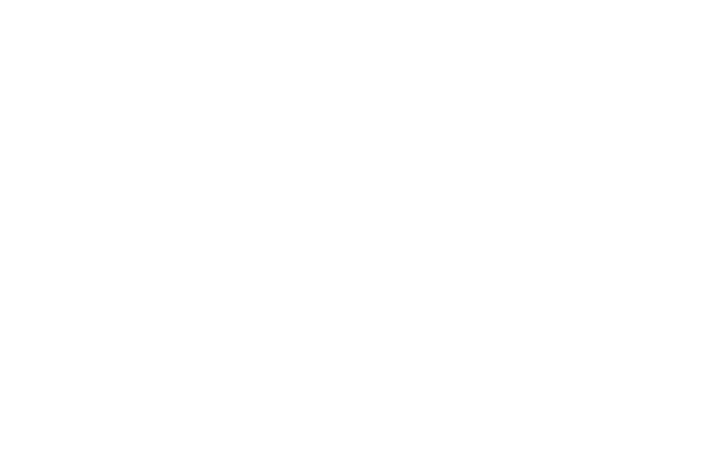

Text(0, 0.5, 'Selected strategy')

In [31]:
fig = plt.figure(figsize=(8,5))
plt.xlabel('Steps',fontsize=10)
plt.title('Convergence of Strategy selection by Thompson Sampling',fontsize=10)
plt.ylabel('Selected strategy',fontsize=10)

In [32]:
ani = matplotlib.animation.FuncAnimation(fig, plot_scatter, frames=100, repeat=True)
#plt.show()
ani.save('thompsonsampling.mp4', writer=writer)

# Regret curves

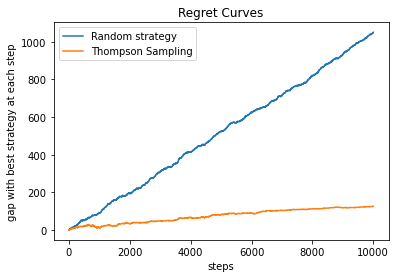

In [33]:
%matplotlib inline
plt.plot(regret_curve_random, label='Random strategy')
plt.plot(regret_curve_thompson, label='Thompson Sampling')
plt.title('Regret Curves')
plt.legend(loc='upper left')
plt.xlabel('steps')
plt.ylabel('gap with best strategy at each step')
plt.savefig('random.png')
plt.show()

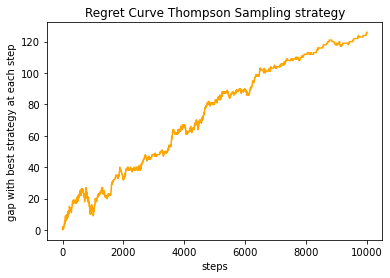

In [34]:
plt.plot(range(N), regret_curve_thompson, color='orange')
plt.title('Regret Curve Thompson Sampling strategy')
plt.xlabel('steps')
plt.ylabel('gap with best strategy at each step')
plt.savefig('thompson.png')
plt.show()